In [2271]:
import pandas as pd

df = pd.read_csv("realestatepriceprediction/train.csv")
df['label'] = 'train'
# X = df.drop('Price', axis=1)
# y = df[['Price']]

X_final = pd.read_csv('realestatepriceprediction/test.csv')
X_final['label'] = 'test'

# Concat
concat_df = pd.concat([df , X_final])


# сразу создам
#  НЕ ПОНЯЛ ЗАЧЕМ?
#  копирют ID из теста в df preds_final
preds_final = pd.DataFrame()
preds_final['Id'] = X_final['Id'].copy()

# заменили штатный Id на ID дынный сетом данных и индексировали по этому столбу
# X.set_index('Id', inplace=True)
# X_final.set_index('Id', inplace=True)
concat_df.set_index('Id', inplace=True)

# print('Строк в трейне:' ,  X.shape[0])
# print('Строк в тесте', X_final.shape[0])


In [2272]:
# concat_df.describe(include='all')

In [2273]:
# df.Ecology_3.unique()

In [2274]:
# df.Shops_1.values

In [2275]:
concat_df.describe(include=['object'])

,Ecology_2,Ecology_3,Shops_2,label
count,15000,15000,15000,15000
unique,2,2,2,2
top,B,B,B,train
freq,14855,14576,13763,10000


In [2276]:
# заменили все категориальные признаки на цифры
concat_df.replace(to_replace='A', value=0, inplace=True)
concat_df.replace(to_replace='B', value=1, inplace=True)

In [2277]:
concat_df['DistrictId'] = concat_df['DistrictId'].astype(str)

In [1]:
# concat_df.info()

In [2279]:
# Rooms
concat_df['Rooms_outlier'] = 0
concat_df.loc[(concat_df['Rooms'] == 0) | (concat_df['Rooms'] >= 6), 'Rooms_outlier'] = 1
concat_df.loc[concat_df['Rooms'] < 1, 'Rooms'] = 1

In [2280]:
 # KitchenSquare
concat_df['KitchenSquare_outlier'] = 0
concat_df.loc[(concat_df['KitchenSquare'] < 3) | (concat_df['KitchenSquare'] > 500),'KitchenSquare_outlier'] = 1

concat_df['KitchenSquare_outlier2'] = 0
concat_df.loc[(concat_df['LifeSquare']//concat_df['KitchenSquare'])<1,'KitchenSquare_outlier2'] = 1
concat_df.loc[(concat_df['LifeSquare']//concat_df['KitchenSquare'])<1,'KitchenSquare'] = concat_df['KitchenSquare'].median()

concat_df['KitchenSquare_outlier3'] = 0
concat_df.loc[(concat_df['KitchenSquare'] - concat_df['KitchenSquare'].mean()).abs() > 3 * concat_df['KitchenSquare'].std(), 'KitchenSquare_outlier3'] = 1

In [2281]:
# HouseFloor, Floor
concat_df['HouseFloor_outlier'] = 0
concat_df.loc[concat_df['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
concat_df.loc[concat_df['HouseFloor'] == 0, 'HouseFloor'] = 1 #self.medians['HouseFloor']

concat_df['HouseFloor_outlier2'] = 0
concat_df.loc[concat_df['Floor'] > concat_df['HouseFloor'], 'HouseFloor_outlier2'] = 1
concat_df.loc[concat_df['Floor'] > concat_df['HouseFloor'], 'Floor'] = concat_df.loc[concat_df['Floor'] > concat_df['HouseFloor'], 'HouseFloor']

In [2282]:
# HouseYear
import datetime

current_year = now = datetime.datetime.now().year

concat_df['HouseYear_outlier'] = 0
concat_df.loc[concat_df['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
concat_df.loc[concat_df['HouseYear'] > current_year, 'HouseYear'] = current_year

In [2283]:
#         Square
concat_df['Square_outlier'] = 0
concat_df.loc[concat_df['Square'] < concat_df['LifeSquare'], 'Square_outlier'] = 1
concat_df.loc[concat_df['Square'] < concat_df['LifeSquare'], 'Square'] = concat_df['LifeSquare'] + concat_df['KitchenSquare']

concat_df['Square_outlier2'] = 0
concat_df.loc[concat_df['Square'] > 1000, 'Square_outlier2'] = 1
concat_df.loc[concat_df['Square'] > 1000, 'Square'] = concat_df['Square'].median()

concat_df['Square_outlier3'] = 0
concat_df.loc[(concat_df['Square'] - concat_df['Square'].mean()).abs() > 3 * concat_df['Square'].std(), 'Square_outlier3'] = 1

In [2284]:
concat_df.drop('Healthcare_1', axis=1, inplace=True)

In [2285]:
concat_df['LifeSquare_nan'] = concat_df['LifeSquare'].isna() * 1
        
condition = (concat_df['LifeSquare'].isna()) &\
              (~concat_df['Square'].isna()) & \
              (~concat_df['KitchenSquare'].isna())

concat_df.loc[condition, 'LifeSquare'] = concat_df.loc[condition, 'Square'] - concat_df.loc[condition, 'KitchenSquare'] - 3

In [2286]:
# df[df.HouseYear>2020]

In [2287]:
# # заменили кривые даты строительства домов
# df['HouseYear'] = df['HouseYear'].replace([4968],1913)
# # df['HouseYear'] = df['HouseYear'].replace([20052011],2005)

In [2288]:
# df[df.HouseYear>2020]

In [2289]:
# df.Square[df.Square<df.LifeSquare]

In [2290]:
# заменили там, где общая площадь была меньше жилой
# df.Square[df.Square<df.LifeSquare]=df.LifeSquare+df.KitchenSquare

In [2291]:
# df[df.Square<df.LifeSquare]

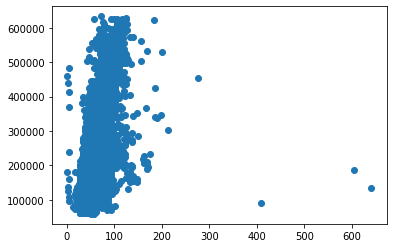

In [2292]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['Square'], df['Price'])

In [2293]:
# df[df.Square>1000]

In [2294]:
# rooms_3 = df[df['Rooms']==3]

In [2295]:
# rooms_3.Square.median()

In [2296]:
# # заменили выброс на медиану для трехкомнатных
# df.loc[df.Square>1000,"Square"] = rooms_3.Square.median()


In [2297]:
# df[df.Square>1000]

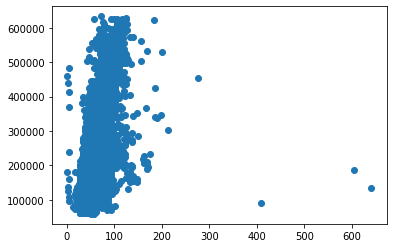

In [2298]:
plt.scatter(df['Square'], df['Price'])

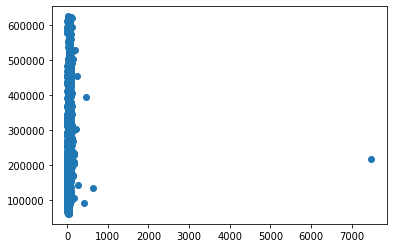

In [2299]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['LifeSquare'], df['Price'])

In [2300]:
# # заменили выброс на медиану для трехкомнатных
# df.loc[df.LifeSquare>1000,"LifeSquare"] = rooms_3.LifeSquare.median()

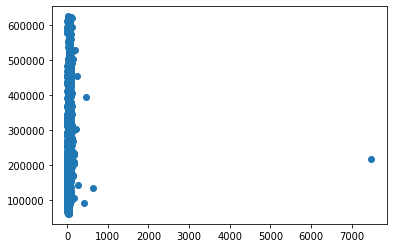

In [2301]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['LifeSquare'], df['Price'])

In [2302]:
# df[(df['Square'] - df['Square'].mean()).abs() > 3 * df['Square'].std()]

# # что с таки делать?? либо заменить на средние, либо сделать отдельный столбик с категорией за 3 сигма?????

In [2303]:
# df["Rooms"].value_counts()

In [2304]:
# for i in df.columns:
#     print(f'Column- {i},unique- {df[i].nunique()}')

In [2305]:
# df.columns

In [2306]:
# # Исключаем признак "id"
# df = df[df.columns[1:]]
# df.columns

In [2307]:
# df.head()

In [2308]:
# df.describe().T

In [2309]:
# df[df.HouseFloor == 0]

In [2310]:
# # заменили дома с 0 этажей
# df.loc[df.HouseFloor == 0,"HouseFloor"] = df.HouseFloor.mean()

In [2311]:
# df[df.HouseFloor == 0]

In [2312]:
# df.nlargest(5, 'Floor_in the house')

In [2313]:
# заменили этаж дома, там где он меньше этажа квартиры
# df.HouseFloor[df.HouseFloor < df.Floor] = df.Floor

In [2314]:
# df.nlargest(5, 'Floor_in the house')

In [2315]:
# Доля жилой площади в общей площади
concat_df['LifeSquare_share'] = concat_df['LifeSquare'] / concat_df['Square'] * 100

# Доля площади кухни в общей площади
concat_df['KitchenSquare_share'] = concat_df['KitchenSquare'] / concat_df['Square']* 100

In [2316]:
# Доля этажа в общей высоте дома
concat_df['Floor_in the house'] = concat_df['Floor'] / concat_df['HouseFloor']* 100

In [2317]:
concat_df_cat = concat_df.groupby('DistrictId')['Rooms'].median()
concat_df_cat = pd.DataFrame(concat_df_cat)

# переименовали заголовок
concat_df_cat.rename(columns={'Rooms': 'median_rooms_district'},
             inplace=True)
concat_df_cat.nlargest(5,'median_rooms_district')

,median_rooms_district
DistrictId,
195,4.0
117,3.0
137,3.0
159,3.0
16,3.0


In [ ]:
# X_final_cat = X_final.groupby('DistrictId')['Rooms'].median()
# X_final_cat = pd.DataFrame(X_final_cat)

# # переименовали заголовок
# X_final_cat.rename(columns={'Rooms': 'median_rooms_district'},
#              inplace=True)
# X_final = X_final.merge(X_final_cat, on='DistrictId')

# X_final.head(3)

In [2318]:
concat_df = concat_df.merge(concat_df_cat, on='DistrictId')

concat_df.head(3)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,HouseFloor_outlier2,HouseYear_outlier,Square_outlier,Square_outlier2,Square_outlier3,LifeSquare_nan,LifeSquare_share,KitchenSquare_share,Floor_in the house,median_rooms_district
0,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.08904,1,...,0,0,0,0,0,0,61.362636,12.504804,77.777778,2.0
1,35,3.0,63.851403,47.245735,6.0,7.0,9.0,1971,0.08904,1,...,0,0,0,0,0,0,73.993261,9.396818,77.777778,2.0
2,35,1.0,47.410775,44.410775,0.0,1.0,1.0,1977,0.08904,1,...,1,0,0,0,0,1,93.672324,0.000000,100.000000,2.0


In [2319]:
concat_df_cat = concat_df.groupby('HouseYear')['Rooms'].median()
concat_df_cat = pd.DataFrame(concat_df_cat)

# переименовали заголовок
concat_df_cat.rename(columns={'Rooms': 'median_rooms_house_year'},
             inplace=True)
concat_df_cat.nlargest(5,'median_rooms_house_year')

,median_rooms_house_year
HouseYear,
1908,5.0
1912,4.0
1940,4.0
1942,4.0
1943,4.0


In [ ]:
# X_final_cat = X_final.groupby('HouseYear')['Rooms'].median()
# X_final_cat = pd.DataFrame(X_final_cat)

# # переименовали заголовок
# X_final_cat.rename(columns={'Rooms': 'median_rooms_house_year'},
#              inplace=True)
# X_final = X_final.merge(X_final_cat, on='HouseYear')

# X_final.head(3)

In [2320]:
concat_df = concat_df.merge(concat_df_cat, on='HouseYear')

concat_df.head(3)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,HouseYear_outlier,Square_outlier,Square_outlier2,Square_outlier3,LifeSquare_nan,LifeSquare_share,KitchenSquare_share,Floor_in the house,median_rooms_district,median_rooms_house_year
0,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.08904,1,...,0,0,0,0,0,61.362636,12.504804,77.777778,2.0,2.0
1,35,2.0,43.325817,22.487877,6.0,7.0,14.0,1969,0.08904,1,...,0,0,0,0,0,51.904104,13.848556,50.000000,2.0,2.0
2,35,3.0,60.434211,42.717400,6.0,9.0,9.0,1969,0.08904,1,...,0,0,0,0,0,70.684136,9.928151,100.000000,2.0,2.0


In [2321]:
# Площадь комнаты
concat_df['Room_square'] = concat_df['LifeSquare'] / concat_df['Rooms']

In [2322]:
# df.head()

In [2323]:
# df.Room_square.describe()

In [2324]:
# df.nlargest(5, 'Room_square')

In [2325]:
# # заменили все комнаты меньше 1 на 1
# df.loc[df.Rooms <1,'Rooms'] = 1

In [ ]:
# Стоимость м2
X['Price'] = y.value
X['Price_m2'] = X['Price'] / X['Square']
X_final['Price_m2'] = 0

X_cat = X.groupby('DistrictId')['Price_m2'].median()
X_cat = pd.DataFrame(X_cat)

# переименовали заголовок
X_cat.rename(columns={'Price_m2': 'median_Price_m2'},
             inplace=True)

X = X.merge(X_cat, on='DistrictId')

X.head(3)

In [2326]:
# Стоимость м2
concat_df['Price_m2'] = concat_df['Price'] / concat_df['Square']

In [2327]:
concat_df_cat = concat_df.groupby('DistrictId')['Price_m2'].median()
concat_df_cat = pd.DataFrame(concat_df_cat)

# переименовали заголовок
concat_df_cat.rename(columns={'Price_m2': 'median_Price_m2'},
             inplace=True)
concat_df_cat.nlargest(5,'median_Price_m2')

,median_Price_m2
DistrictId,
181,8700.768533
190,8645.171143
201,8397.602044
182,8008.603353
208,8005.605047


In [2328]:
concat_df = concat_df.merge(concat_df_cat, on='DistrictId')

concat_df.head(3)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Square_outlier3,LifeSquare_nan,LifeSquare_share,KitchenSquare_share,Floor_in the house,median_rooms_district,median_rooms_house_year,Room_square,Price_m2,median_Price_m2
0,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.08904,1,...,0,0,61.362636,12.504804,77.777778,2.0,2.0,14.721375,3854.958571,4358.274853
1,35,2.0,43.325817,22.487877,6.0,7.0,14.0,1969,0.08904,1,...,0,0,51.904104,13.848556,50.000000,2.0,2.0,11.243939,4481.748059,4358.274853
2,35,3.0,60.434211,42.717400,6.0,9.0,9.0,1969,0.08904,1,...,0,0,70.684136,9.928151,100.000000,2.0,2.0,14.239133,4880.709056,4358.274853


In [2329]:
# df.to_csv(PREPARED_DATASET_DIPLOMA, index=False, encoding='utf-8')

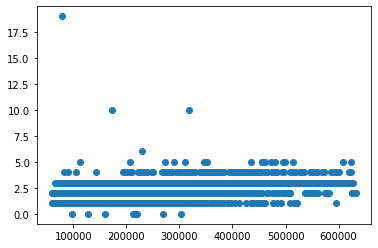

In [2330]:
plt.scatter(df.Price,df.Rooms)
plt.show()

In [2331]:
# df[df.Rooms>7]

In [2332]:
# df.Rooms.mean()

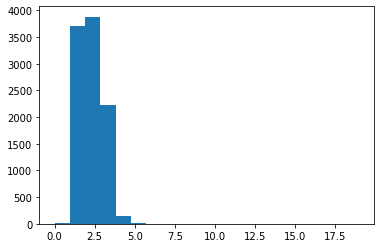

In [2333]:
hist_info = plt.hist(df.Rooms, bins=20)

plt.show()

In [2334]:
# df_cat = df.groupby('DistrictId')['median_Price_m2'].median()
# df_cat = pd.DataFrame(df_cat)
# df_price = df_cat["median_Price_m2"].sort_values()
# # df_price.index = df_cat["DistrictId"]

# df_price.head()

In [2335]:
# df_price.plot(kind="barh")

# plt.show()

In [2336]:
# hist_info = plt.hist(df.median_Price_m2, bins=30)

# plt.show()

In [2337]:
# df_price = df["median_Price_m2"]
# df_price.index = df["DistrictId"]

# df_price.plot(kind="hist",bins=20)

# plt.show()

In [2338]:
# from pylab import rcParams

# rcParams["figure.figsize"] = 12, 18

# df_price.plot(kind="barh")
# plt.title("Стоимость м2 в разных районах")

# plt.show()

In [2339]:
# rcParams["figure.figsize"] = 10, 6 # ???

# %config InlineBackend.figure_format = 'svg'
# label_font = {
#     "fontsize": 12,
#     "family": "serif",
#     "color":"DarkBlue"
# }

# plt.hist(df_price, color="lightgrey", ec="white")
# plt.title("Распределение стоимости м2")
# plt.xlabel("Цена за квадратный метр", fontdict=label_font)
# # plt.ylabel("Функция f(x)", fontdict=label_font)
# # plt.axis([-5, 5, -8, 8])
# plt.legend(labels=["М2"])
# # plt.legend(loc="lower right")

# plt.show()

In [2340]:
# fig, ax = plt.subplots(nrows=2, ncols=2)
# ax1, ax2, ax3, ax4 = ax.flatten()

# fig.set_size_inches(8, 6)
# fig.subplots_adjust(wspace=0.3, hspace=0.3)

# ax1.scatter(df.Price, df.Rooms)
# ax1.set_title('График Rooms/Price')

# ax2.scatter(df.Price, df.Square)
# ax2.set_title('График Square/Price')

# ax3.scatter(df.Price, df.KitchenSquare)
# ax3.set_title('График KitchenSquare/Price')

# ax4.scatter(df.Price, df.Floor)
# ax4.set_title('График Floor/Price')

In [2341]:
# df[df.KitchenSquare>500]

In [2342]:
# df[df.KitchenSquare>500]

In [2343]:
# df[df.Rooms>8]

In [2344]:
# df[df.Rooms>8]

In [2345]:
# fig, ax = plt.subplots(nrows=2, ncols=2)
# ax1, ax2, ax3, ax4 = ax.flatten()

# fig.set_size_inches(8, 6)
# fig.subplots_adjust(wspace=0.3, hspace=0.3)

# ax1.scatter(df.Price, df.Rooms)
# ax1.set_title('График Rooms/Price')

# ax2.scatter(df.Price, df.Square)
# ax2.set_title('График Square/Price')

# ax3.scatter(df.Price, df.KitchenSquare)
# ax3.set_title('График KitchenSquare/Price')

# ax4.scatter(df.Price, df.Floor)
# ax4.set_title('График Floor/Price')

In [2346]:
# df[df.KitchenSquare>80]

In [2347]:
concat_df.head(3)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Square_outlier3,LifeSquare_nan,LifeSquare_share,KitchenSquare_share,Floor_in the house,median_rooms_district,median_rooms_house_year,Room_square,Price_m2,median_Price_m2
0,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.08904,1,...,0,0,61.362636,12.504804,77.777778,2.0,2.0,14.721375,3854.958571,4358.274853
1,35,2.0,43.325817,22.487877,6.0,7.0,14.0,1969,0.08904,1,...,0,0,51.904104,13.848556,50.000000,2.0,2.0,11.243939,4481.748059,4358.274853
2,35,3.0,60.434211,42.717400,6.0,9.0,9.0,1969,0.08904,1,...,0,0,70.684136,9.928151,100.000000,2.0,2.0,14.239133,4880.709056,4358.274853


In [2348]:
concat_df_copy = concat_df
concat_df.KitchenSquare[concat_df.Square<concat_df.KitchenSquare]=concat_df.KitchenSquare.median()

C:\Users\lobapid3\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [2349]:
concat_df_copy.head(3)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Square_outlier3,LifeSquare_nan,LifeSquare_share,KitchenSquare_share,Floor_in the house,median_rooms_district,median_rooms_house_year,Room_square,Price_m2,median_Price_m2
0,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.08904,1,...,0,0,61.362636,12.504804,77.777778,2.0,2.0,14.721375,3854.958571,4358.274853
1,35,2.0,43.325817,22.487877,6.0,7.0,14.0,1969,0.08904,1,...,0,0,51.904104,13.848556,50.000000,2.0,2.0,11.243939,4481.748059,4358.274853
2,35,3.0,60.434211,42.717400,6.0,9.0,9.0,1969,0.08904,1,...,0,0,70.684136,9.928151,100.000000,2.0,2.0,14.239133,4880.709056,4358.274853


In [2]:
# concat_df_copy.info()

In [2351]:
concat_df_copy = concat_df
concat_df.loc[concat_df.Rooms>8,'Rooms'] = concat_df.Square/concat_df.Room_square.median()


In [3]:
# concat_df_copy.info()

In [2353]:
concat_df['floor_cat'] = np.nan

concat_df.loc[concat_df['Floor'] < 3, 'floor_cat'] = 1  
concat_df.loc[(concat_df['Floor'] >= 3) & (concat_df['Floor'] <= 5), 'floor_cat'] = 2
concat_df.loc[(concat_df['Floor'] > 5) & (concat_df['Floor'] <= 9), 'floor_cat'] = 3
concat_df.loc[(concat_df['Floor'] > 9) & (concat_df['Floor'] <= 15), 'floor_cat'] = 4
concat_df.loc[concat_df['Floor'] > 15, 'floor_cat'] = 5

In [4]:
# concat_df_copy.info()

In [2355]:
concat_df['year_cat'] = np.nan
        
concat_df.loc[concat_df['HouseYear'] < 1941, 'year_cat'] = 1
concat_df.loc[(concat_df['HouseYear'] >= 1941) & (concat_df['HouseYear'] <= 1945), 'year_cat'] = 2
concat_df.loc[(concat_df['HouseYear'] > 1945) & (concat_df['HouseYear'] <= 1980), 'year_cat'] = 3
concat_df.loc[(concat_df['HouseYear'] > 1980) & (concat_df['HouseYear'] <= 2000), 'year_cat'] = 4
concat_df.loc[(concat_df['HouseYear'] > 2000) & (concat_df['HouseYear'] <= 2010), 'year_cat'] = 5
concat_df.loc[(concat_df['HouseYear'] > 2010), 'year_cat'] = 6

In [5]:
# concat_df_copy.info()

In [2357]:
# DistrictID
district = concat_df['DistrictId'].value_counts()
district = district[district > 50]  ## Если вы этого не сделаете, то на Leaderboard-е улетите в самый низ (>100 места, R2 ~ 0.65),
                                    ## Хотя на локальной валидации скор вырастет

# отфильтровали строки только строки с дистриктами, где более 50 наблюдений



In [6]:
# concat_df.info()

In [2359]:
DistrictId_counts = dict(district)
# создали словарь из район-количество наблюдений

concat_df['DistrictId_popular'] = concat_df['DistrictId'].copy()
# зачем-то копируем столбик Дистрик в столбик ДистриктПопюлар

In [7]:
# concat_df.info()

In [2361]:

# concat_df.loc[concat_df['DistrictId_popular'].isin(district.keys().tolist())] = np.nan
# # если номер дистрикта есть в словаре  самых популярных дистриктов, то заполняем столбец Nan
# # Метод ndarray.tolist() преобразует массив NumPy в список Python.
# 
concat_df.loc[concat_df['DistrictId_popular'].isin(district.keys().tolist()), 'DistrictId_popular'] = np.nan
# если номер дистрикта есть в словаре  самых популярных дистриктов, то заполняем столбец Nan
# Метод ndarray.tolist() преобразует массив NumPy в список Python.

In [8]:
# concat_df['DistrictId_popular'].describe()

In [9]:
# concat_df.info()

In [10]:
# dftest = pd.DataFrame([1,2,3,4,5])
# dicttest = {1:'d',2:'b',7:'y'}
# dftest[dftest.isin(dicttest.keys())] = np.nan
# dftest

In [2365]:
med_price_by_district = concat_df.groupby(['DistrictId_popular', 'Rooms'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByDistrict',
                                                           'DistrictId_popular': 'DistrictId'})

# concat_df_cat = concat_df.groupby('DistrictId')['Price_m2'].median()
med_price_by_district = pd.DataFrame(med_price_by_district)

concat_df = concat_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'],how='left')

# # переименовали заголовок
# concat_df_cat.rename(columns={'Price_m2': 'median_Price_m2'},
#              inplace=True)
# concat_df_cat.nlargest(5,'median_Price_m2')
# concat_df = concat_df.merge(concat_df_cat, on='DistrictId')

concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DistrictId               15000 non-null  object 
 1   Rooms                    15000 non-null  float64
 2   Square                   15000 non-null  float64
 3   LifeSquare               15000 non-null  float64
 4   KitchenSquare            15000 non-null  float64
 5   Floor                    15000 non-null  float64
 6   HouseFloor               15000 non-null  float64
 7   HouseYear                15000 non-null  int64  
 8   Ecology_1                15000 non-null  float64
 9   Ecology_2                15000 non-null  int64  
 10  Ecology_3                15000 non-null  int64  
 11  Social_1                 15000 non-null  int64  
 12  Social_2                 15000 non-null  int64  
 13  Social_3                 15000 non-null  int64  
 14  Helthcare_2           

In [2366]:
concat_df['DistrictId_count'] = concat_df['DistrictId'].map(DistrictId_counts)  # DistrictId_counts = {'id': value}
#  MAP Used for substituting each value in a Series with another value 
# values in Series that are not in the dictionary (as keys) are converted to NaN.
# в этом столбике указано количество наблюдений в этом дистрикте из словаря 

concat_df['new_district'] = 0
concat_df.loc[concat_df['DistrictId_count'].isna(), 'new_district'] = 1
# ставим 1 везде, где данные Nan

concat_df['DistrictId_count'].fillna(5, inplace=True)
# везде,где Nan заполнить количеством 5? Медиана-89. Средняя - 139
concat_df.head(3)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,median_rooms_house_year,Room_square,Price_m2,median_Price_m2,floor_cat,year_cat,DistrictId_popular,MedPriceByDistrict,DistrictId_count,new_district
0,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.08904,1,...,2.0,14.721375,3854.958571,4358.274853,3.0,3.0,35,207786.135836,5.0,1
1,35,2.0,43.325817,22.487877,6.0,7.0,14.0,1969,0.08904,1,...,2.0,11.243939,4481.748059,4358.274853,3.0,3.0,35,207786.135836,5.0,1
2,35,3.0,60.434211,42.717400,6.0,9.0,9.0,1969,0.08904,1,...,2.0,14.239133,4880.709056,4358.274853,3.0,3.0,35,242403.715876,5.0,1


In [2367]:
med_price_by_floor_year = concat_df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
med_price_by_floor_year = pd.DataFrame(med_price_by_floor_year)    
    
concat_df = concat_df.merge(med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
concat_df.head(3)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Room_square,Price_m2,median_Price_m2,floor_cat,year_cat,DistrictId_popular,MedPriceByDistrict,DistrictId_count,new_district,MedPriceByFloorYear
0,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.08904,1,...,14.721375,3854.958571,4358.274853,3.0,3.0,35,207786.135836,5.0,1,193455.822517
1,35,2.0,43.325817,22.487877,6.0,7.0,14.0,1969,0.08904,1,...,11.243939,4481.748059,4358.274853,3.0,3.0,35,207786.135836,5.0,1,193455.822517
2,35,3.0,60.434211,42.717400,6.0,9.0,9.0,1969,0.08904,1,...,14.239133,4880.709056,4358.274853,3.0,3.0,35,242403.715876,5.0,1,193455.822517


In [11]:
# concat_df.info()

In [2369]:
# Split your data
X = concat_df[concat_df['label'] == 'train']
X_final = concat_df[concat_df['label'] == 'test']

# Drop your labels
X = X.drop('label', axis=1)
X_final = X_final.drop('label', axis=1)

In [2370]:
X_final = X_final.drop('Price', axis=1)


In [2371]:
X.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2',
       'Price', 'Rooms_outlier', 'KitchenSquare_outlier',
       'KitchenSquare_outlier2', 'KitchenSquare_outlier3',
       'HouseFloor_outlier', 'HouseFloor_outlier2', 'HouseYear_outlier',
       'Square_outlier', 'Square_outlier2', 'Square_outlier3',
       'LifeSquare_nan', 'LifeSquare_share', 'KitchenSquare_share',
       'Floor_in the house', 'median_rooms_district',
       'median_rooms_house_year', 'Room_square', 'Price_m2', 'median_Price_m2',
       'floor_cat', 'year_cat', 'DistrictId_popular', 'MedPriceByDistrict',
       'DistrictId_count', 'new_district', 'MedPriceByFloorYear'],
      dtype='object')

In [2372]:
remain_features = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2',
       'Rooms_outlier', 'KitchenSquare_outlier',
       'KitchenSquare_outlier2', 'KitchenSquare_outlier3',
       'HouseFloor_outlier', 'HouseFloor_outlier2', 'HouseYear_outlier',
       'Square_outlier', 'Square_outlier2', 'Square_outlier3',
       'LifeSquare_nan', 'LifeSquare_share', 'KitchenSquare_share',
       'Floor_in the house', 'median_rooms_district',
       'median_rooms_house_year', 'Room_square', 'Price_m2', 'median_Price_m2',
       'floor_cat', 'year_cat',  'MedPriceByDistrict',
       'DistrictId_count', 'new_district', 'MedPriceByFloorYear']
y = X[['Price']]
X = X[remain_features]
X_final = X_final[remain_features]

In [12]:
# X_final.info()

In [13]:
# X.info()

In [2375]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

from lightgbm import LGBMRegressor
 
# y = X[['Price']]
# X = X.drop('Price', axis=1)


model = LGBMRegressor(max_depth=7,
                             min_samples_leaf=30,
                             n_estimators=300,
                             random_state=42)

cv_score = cross_val_score(model, X, y, 
                           scoring='r2', 
                           cv=KFold(n_splits=5, shuffle=True, random_state=42))
# cv_score
mean = cv_score.mean()
std = cv_score.std()

print('R2: {:.3f} +- {:.3f}'.format(mean, std))

[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
R2: 0.993 +- 0.002


In [2376]:
model.fit(X, y)

[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=7,
              min_child_samples=20, min_child_weight=0.001, min_samples_leaf=30,
              min_split_gain=0.0, n_estimators=300, n_jobs=-1, num_leaves=31,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

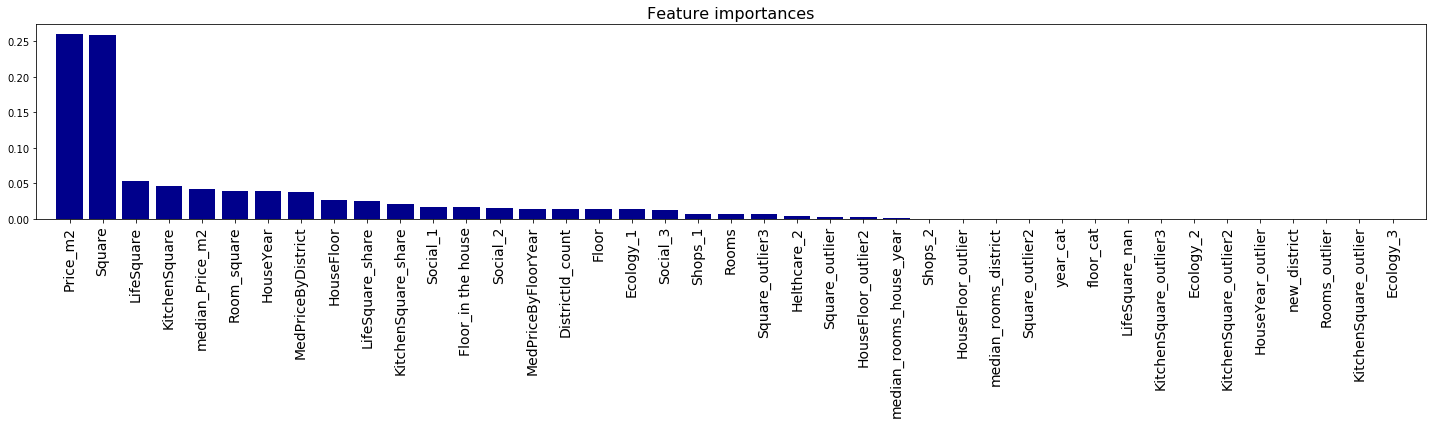

In [2377]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra

def plot_feature_importances(importances, X):
    
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize = (20, 6))
    plt.title("Feature importances", fontsize=16)
    plt.bar(range(X.shape[1]), importances[indices] / importances.sum(),
           color="darkblue", align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation = 90, fontsize=14)
    plt.xlim([-1, X.shape[1]])

    plt.tight_layout()
    # plt.savefig('fe.jpg')
    plt.show()
    
plot_feature_importances(importances = model.feature_importances_, X=X)

In [2378]:
# # Get missing columns in the training test
# missing_cols = set( X.columns ) - set( X_final.columns )
# # Add a missing column in test set with default value equal to 0
# for c in missing_cols:
#     X_final[c] = 0
# # Ensure the order of column in the test set is in the same order than in train set
# X_final = X_final[X.columns]
# # X_final.head()

In [2379]:
# X_final = pd.read_csv('realestatepriceprediction/test.csv')

y_pred_final = model.predict(X_final)

preds_final['Price'] = y_pred_final
preds_final.to_csv('realestatepriceprediction/predictions.csv', index=False)

preds_final.head()



,Id,Price
0,725,61168.691773
1,15856,64966.618121
2,5480,68837.743682
3,15664,68666.400566
4,14275,73249.189129


In [2380]:
preds_final.shape

(5000, 2)

In [2381]:
preds_final.Price.describe()

count      5000.000000
mean      68814.651488
std       15018.524899
min       27067.764595
25%       60698.072893
50%       65367.056730
75%       72184.660772
max      261096.731760
Name: Price, dtype: float64